In [1]:
import pandas as pd

In [151]:
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format='retina'

rcParams['figure.figsize'] = 13,8

### Обязательная часть

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

* построить не менее 4 визуализаций различных видов;
* каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
* по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?)

#### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [3]:
apps = pd.read_csv('googleplaystore.csv')

In [4]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
apps_paid = apps[apps.Type == 'Paid']
apps_paid.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


In [6]:
apps[apps.Type == 'Paid'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


***

Посмотрим соотношение количества платных приложений по отношению к бесплатным

In [7]:
apps_type_count = apps['Type'].value_counts()
apps_type_count

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

Видно, что в наборе данных есть приложение с непонятным типом. Посмотрим что это за приложение

In [8]:
apps.loc[apps['Type'] == '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Похоже, что данные были испорчены. Удалим из выборки

In [9]:
apps = apps.drop([10472])

<AxesSubplot:title={'center':'Кол-во приложений по типу'}, xlabel='Тип', ylabel='Кол-во приложений'>

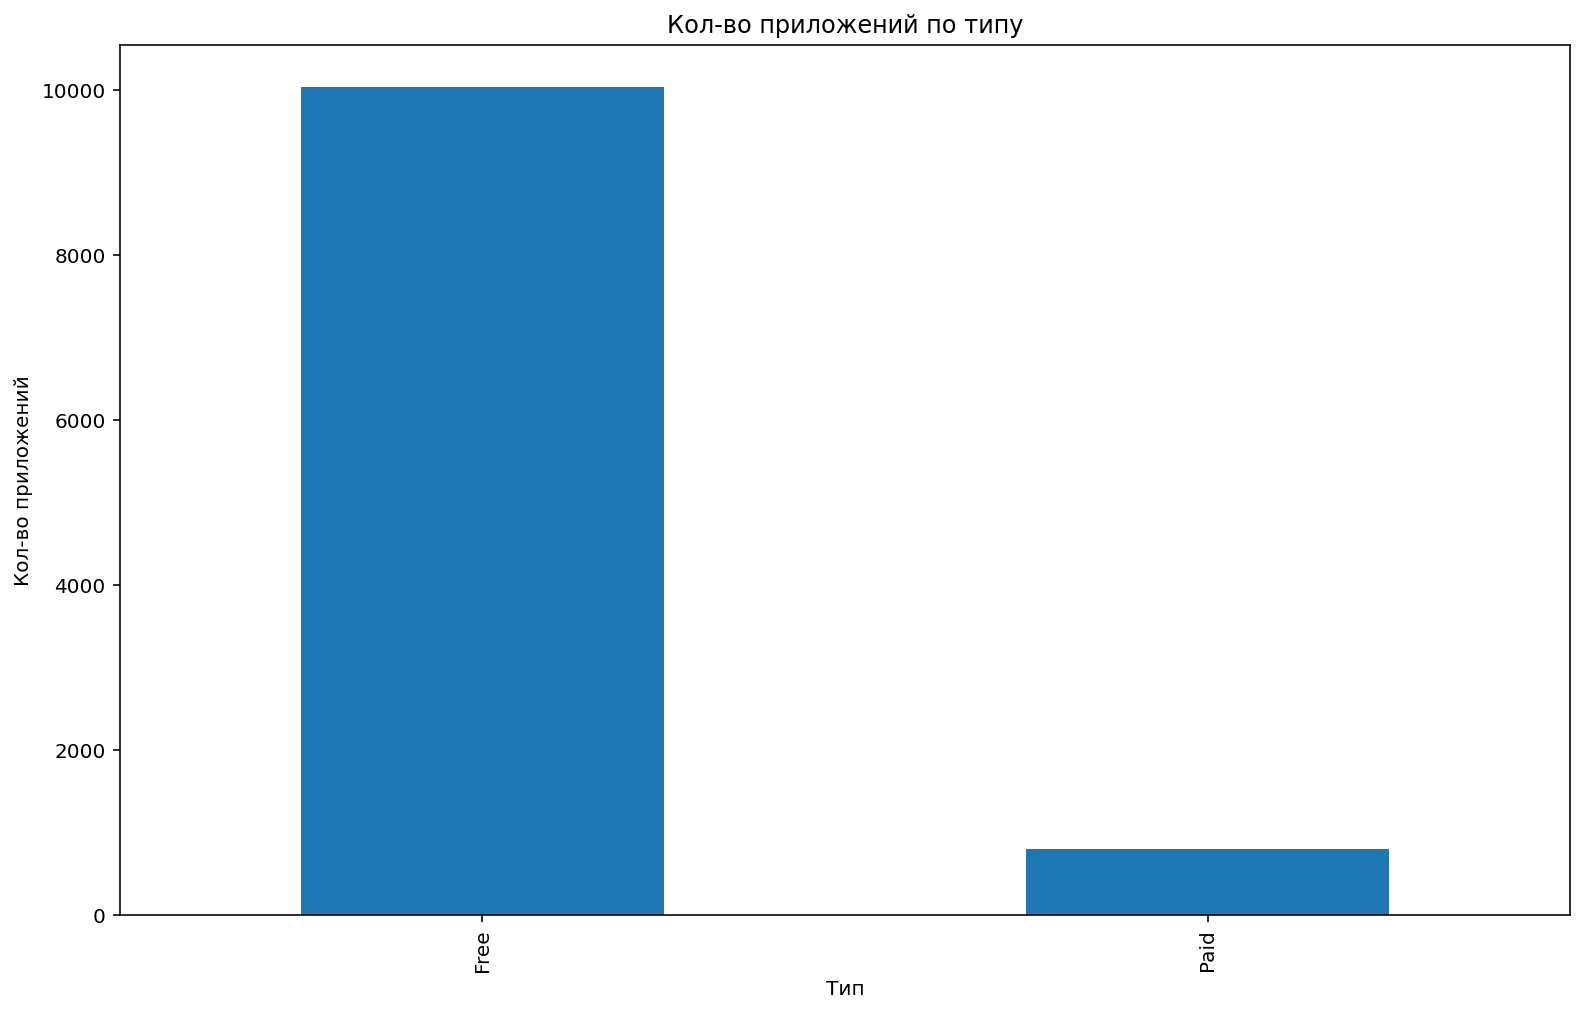

In [10]:
apps_type_count = apps['Type'].value_counts()
apps_type_count.plot.bar(title='Кол-во приложений по типу', xlabel='Тип', ylabel='Кол-во приложений')

### Интерпретация
Видно, что количество бесплатных приложений на платформе Android существенно превышает количество платных

### Вывод
Это может говорить о том, что создатели приложений считают пользователей менее склонными к моментальным покупкам (покупка приложения до начала пользования). Следовательно коммерциализация приложения во многих случаях происходит за счет вставки в приложения рекламы

***

Посмотрим распределение оценок по типу приложения (платное и бесплатное)

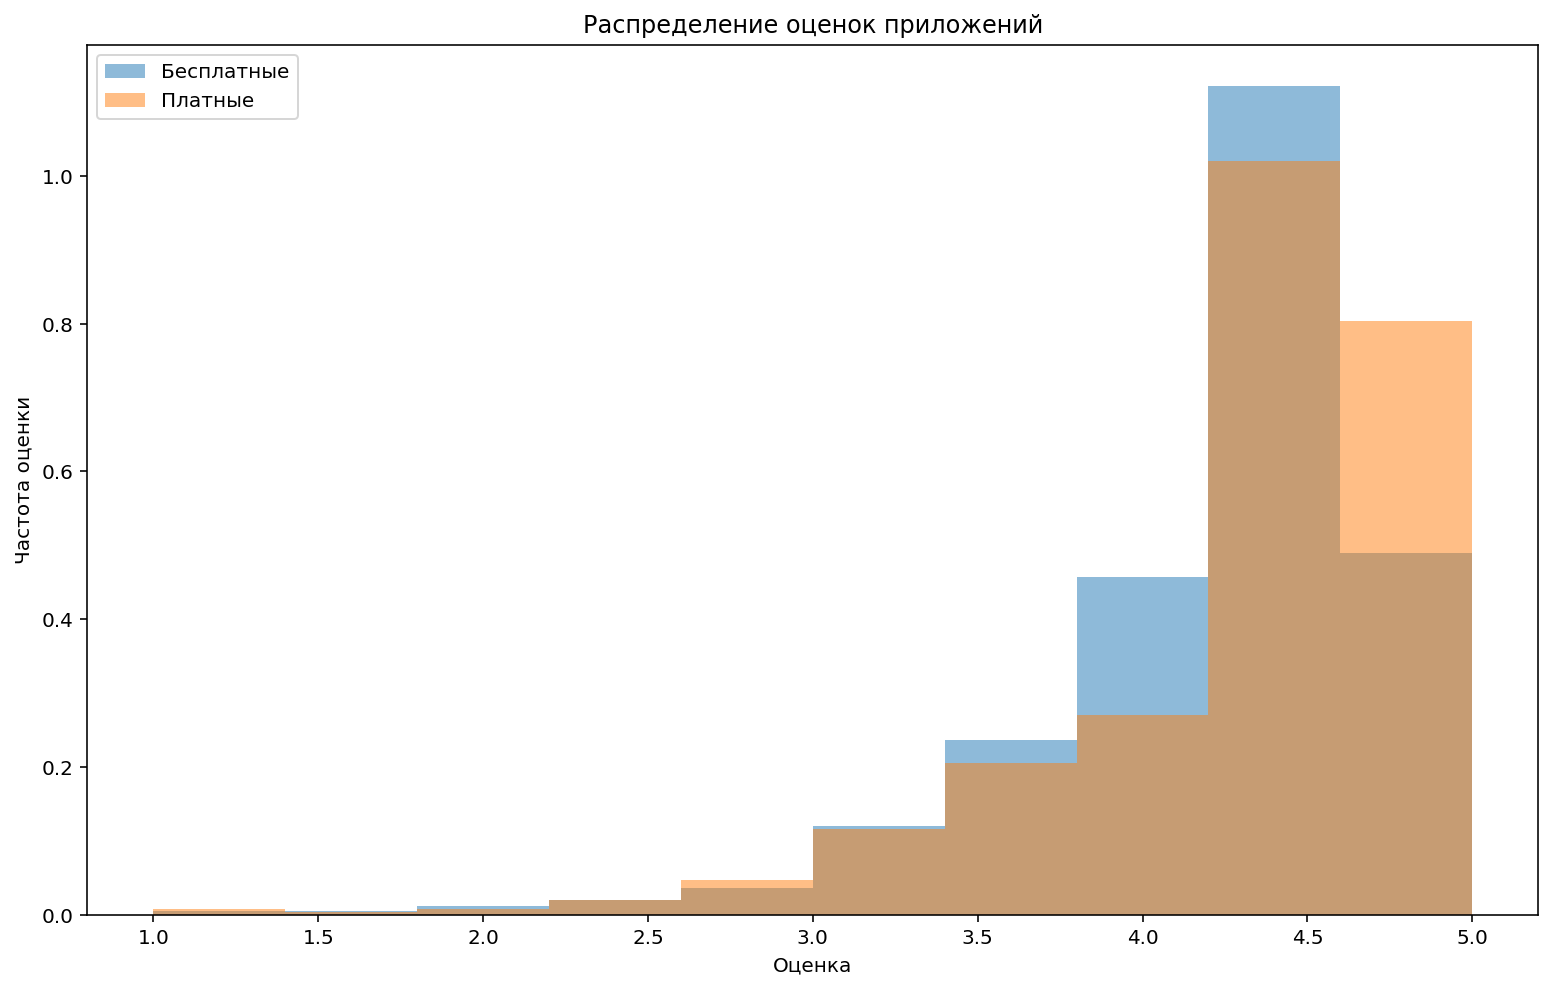

In [11]:
apps_free = apps[apps.Type == 'Free']
apps_paid = apps[apps.Type == 'Paid']

plt.hist(apps_free.Rating, label='Бесплатные', alpha=0.5, density=True)
plt.hist(apps_paid.Rating, label='Платные', alpha=0.5, density=True)
plt.title('Распределение оценок приложений')
plt.xlabel('Оценка')
plt.ylabel('Частота оценки')
plt.legend(loc='upper left')

### Интерпретация
Из этого графика видно, что в обоих случаях (как для платных, так и для бесплатных приложений) распределение является нормальным со смещением вправо. Однако, платные приложения получают гораздо оценок, близких к максимальным (нет ярко выраженного правого хвоста), тогда как у бесплатных оценки ~4 и ~5 распределены относительно равномерно. В обоих случаях большинство оценок концетрировалось около 4.4

### Вывод
Большое количество оценок, близких к максимальным, в случае платных приложений может говорить о том, что они в целом более качественные (написаны большими командами профессиональных разработчиков)

***

Проверим корреляция между оценками приложений и их ценой

In [12]:
apps.loc[apps.Type == 'Paid', 'Price'] = apps_paid['Price'].str.replace('$', '', regex=False).astype('float')
apps_paid = apps.loc[apps.Type == 'Paid']

<AxesSubplot:xlabel='Цена', ylabel='Оценка'>

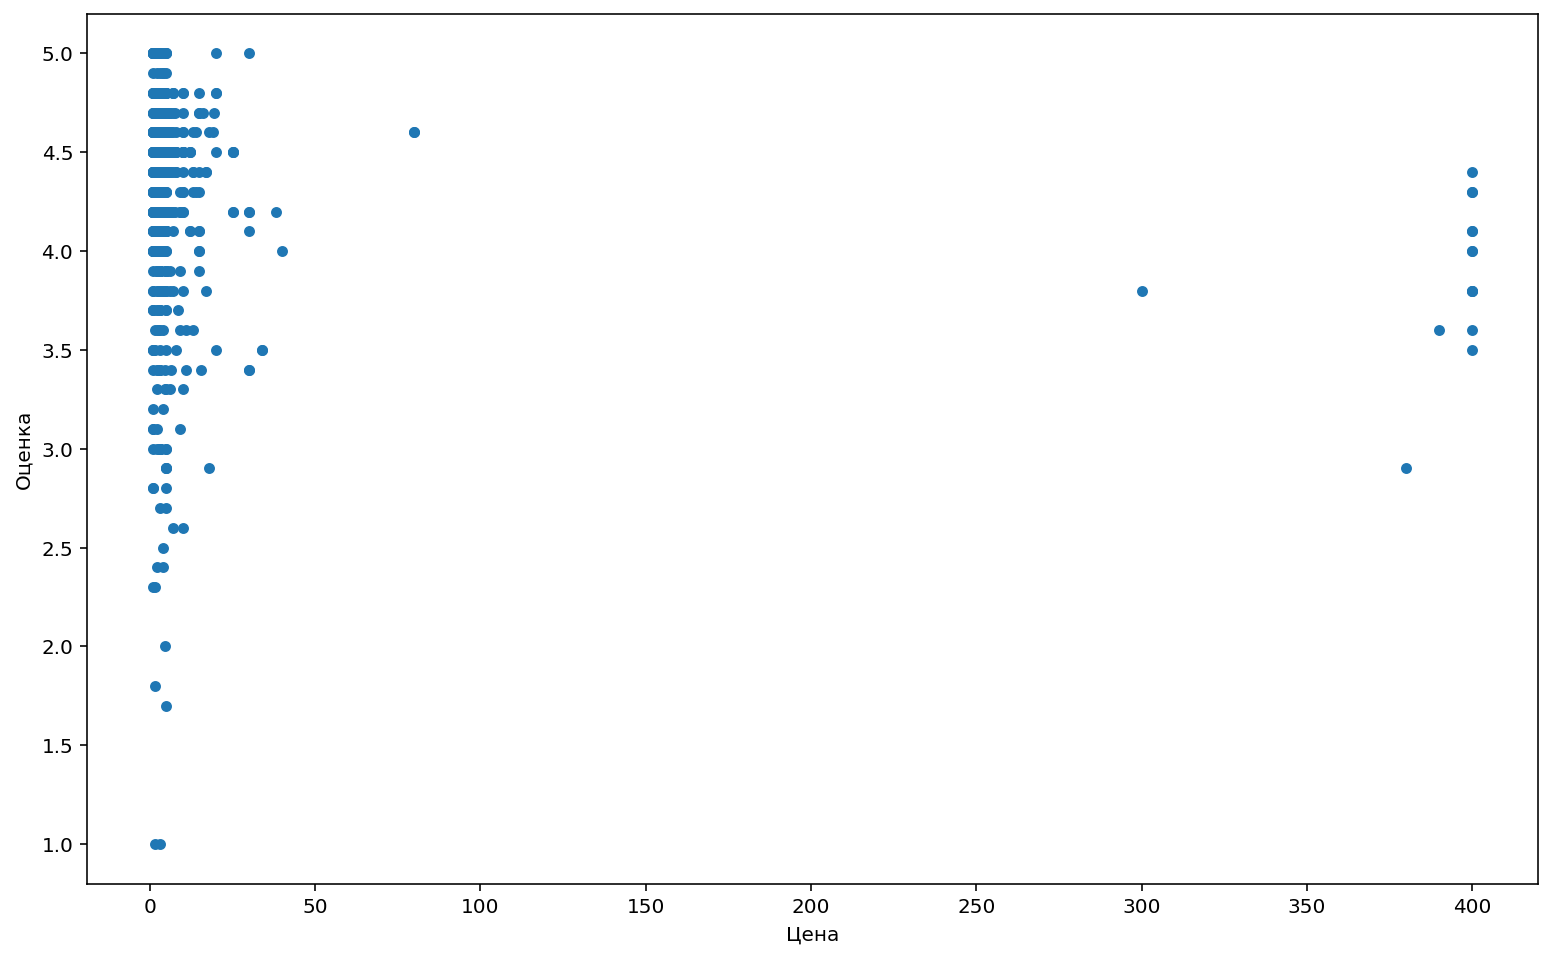

In [30]:
apps_paid.plot.scatter(x='Price', y='Rating', xlabel='Цена', ylabel='Оценка')

На графике видно определенное количество крайне дорогих приложений. Посмотрим на график, установив более привычные границы цены 

(0.0, 30.0)

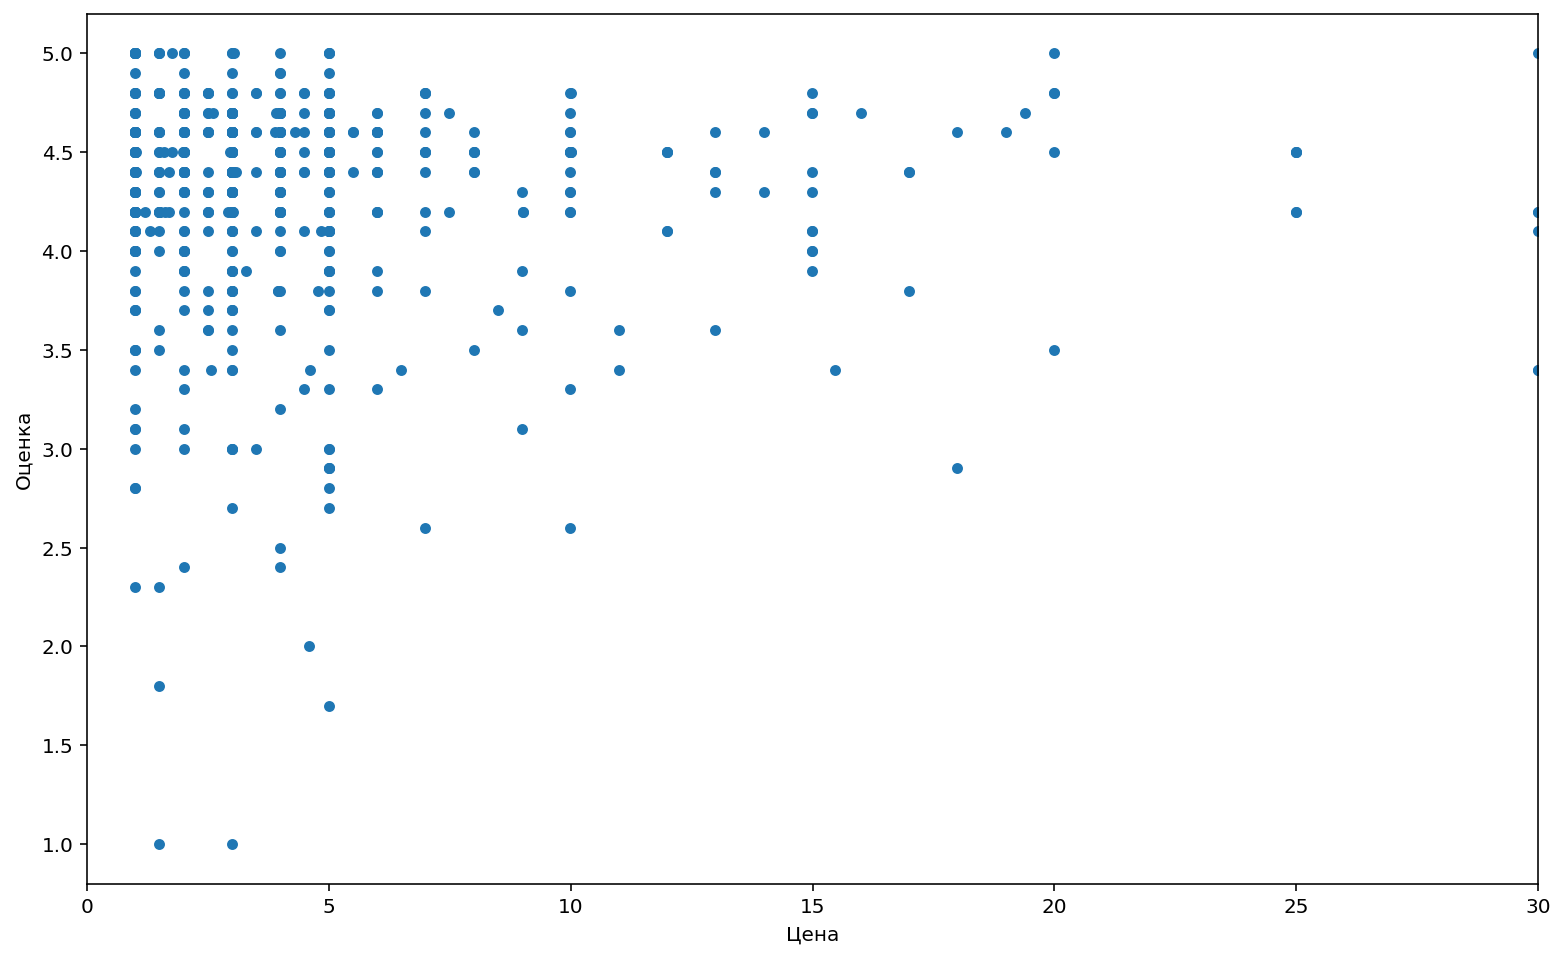

In [31]:
apps_paid_price_rating_scatter_plot = apps_paid.plot.scatter(x='Price', y='Rating', xlabel='Цена', ylabel='Оценка')
apps_paid_price_rating_scatter_plot.set_xlim(0,30)

### Интерпретация

На первом графике очень хорошо видно аномальный выброс по цене. На втором точки на графике концентрируюстся в основном в левом верхнем углу. Есть небольшой разброс точек в левом нижнем и правом верхнем углу. Интересно то, что в правом нижнем углу точек совсем нет

### Вывод

Анормальный выброс на первом графике на самом деле говорит о том, что на рынке есть небольшой количество так называемых элитных приложений, цена на которые искусственно завышена для ограничения числа пользователей. Это преимущественно небольшие социальные сети не для всех. Анализируя второй график можно сказать, что у платных приложений преимущественно хорошие оценки, что как мы уже говорили, говорит о том, что у них высокое качество. Однако еще можно заметить следующие особенности:

- Есть небольшое количество достаточно дорогих приложений (от 10 долларов), оценки у них достаточно высокие
- Самые низкие оценки получают приложения с низкой ценой (до 5 долларов)
- Приложения со средней и высокой ценой (от 5 долларов) вообще не получают низких оценок

***

Посмотрим распределение приложений по категориям

In [26]:
apps_count_by_categories = apps[['App', 'Category']].groupby('Category').count().sort_values(by='App')

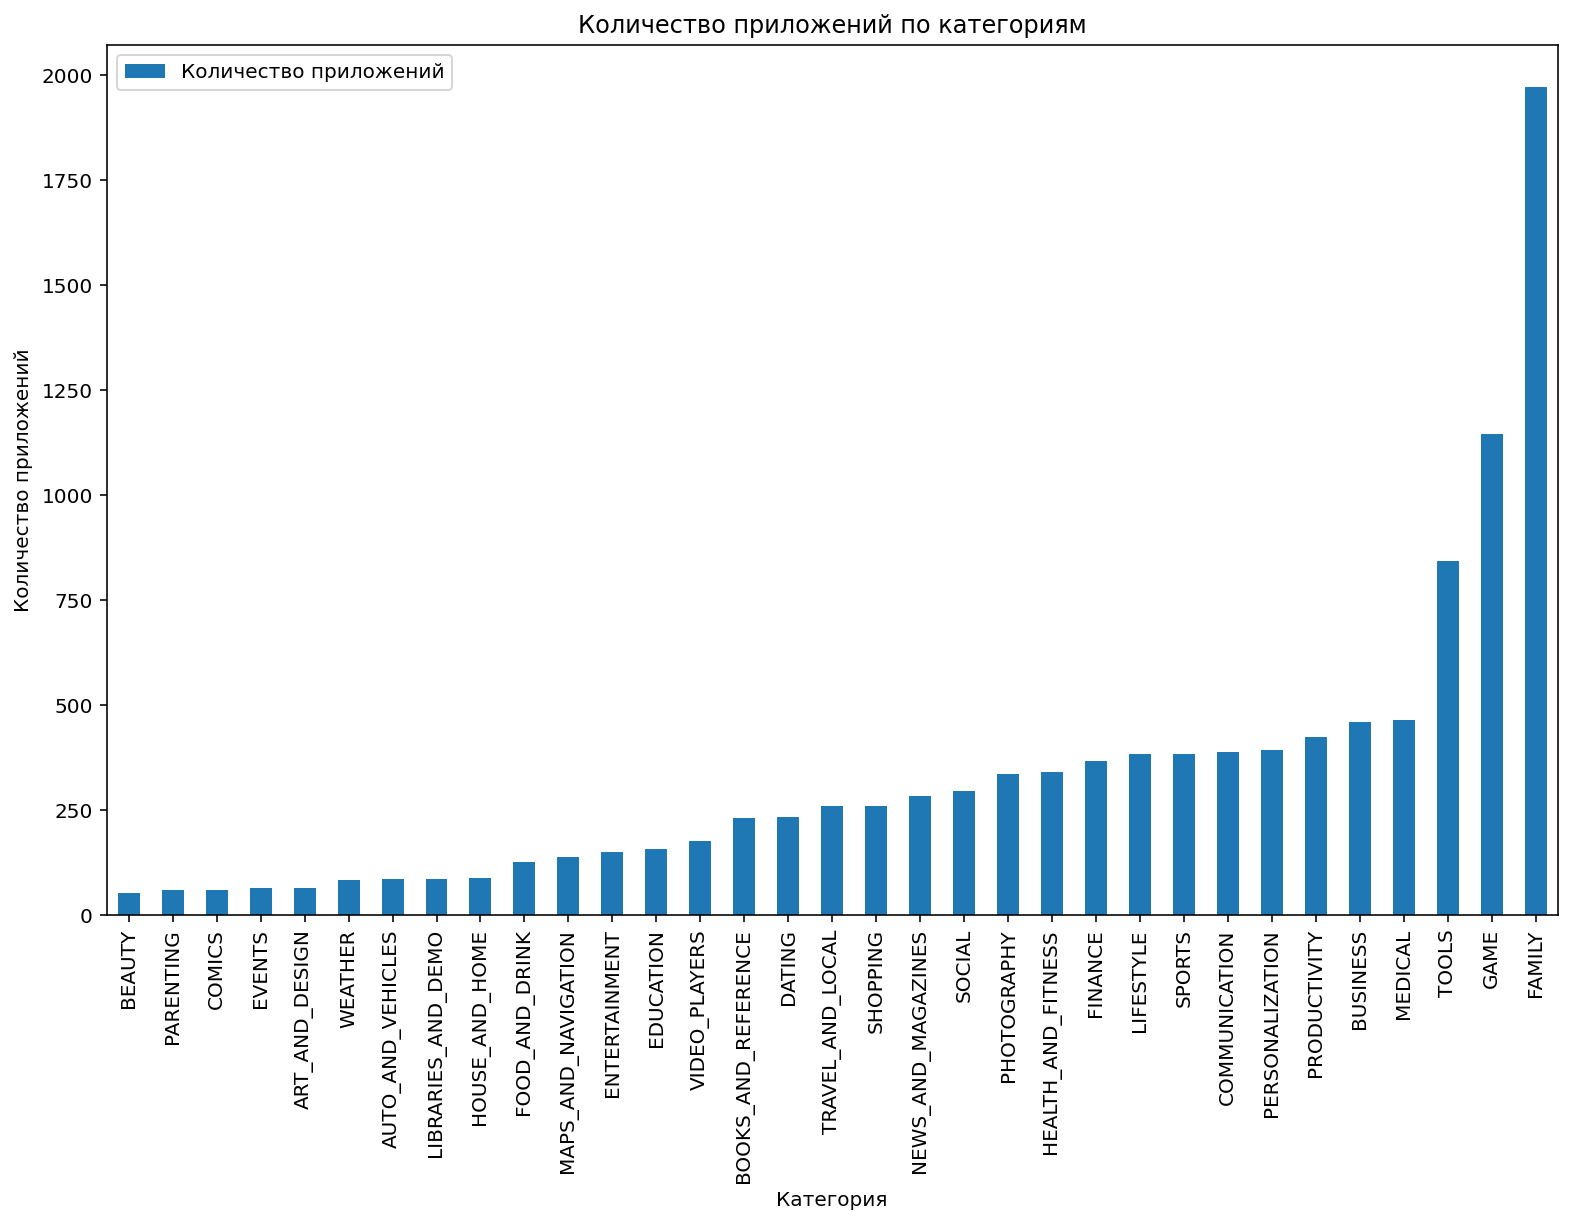

In [44]:
apps_count_by_categories_bar_chart = apps_count_by_categories.plot.bar(title='Количество приложений по категориям', xlabel='Категория', ylabel='Количество приложений')
apps_count_by_categories_bar_chart.legend(['Количество приложений'])

### Интерпретация

На графике явно выделяются три категории: семья, игры и инструменты. В этих категориях самое большое количество приложений на рынке

### Вывод

Можно сказать, что в этих трех категориях самая большая конкуренция

***

Теперь давайте посмотрим также распределение приложений по категориям, но уже среди платынх приложений

In [35]:
apps_paid_count_by_categories = apps_paid[['App', 'Category']].groupby('Category').count().sort_values(by='App')

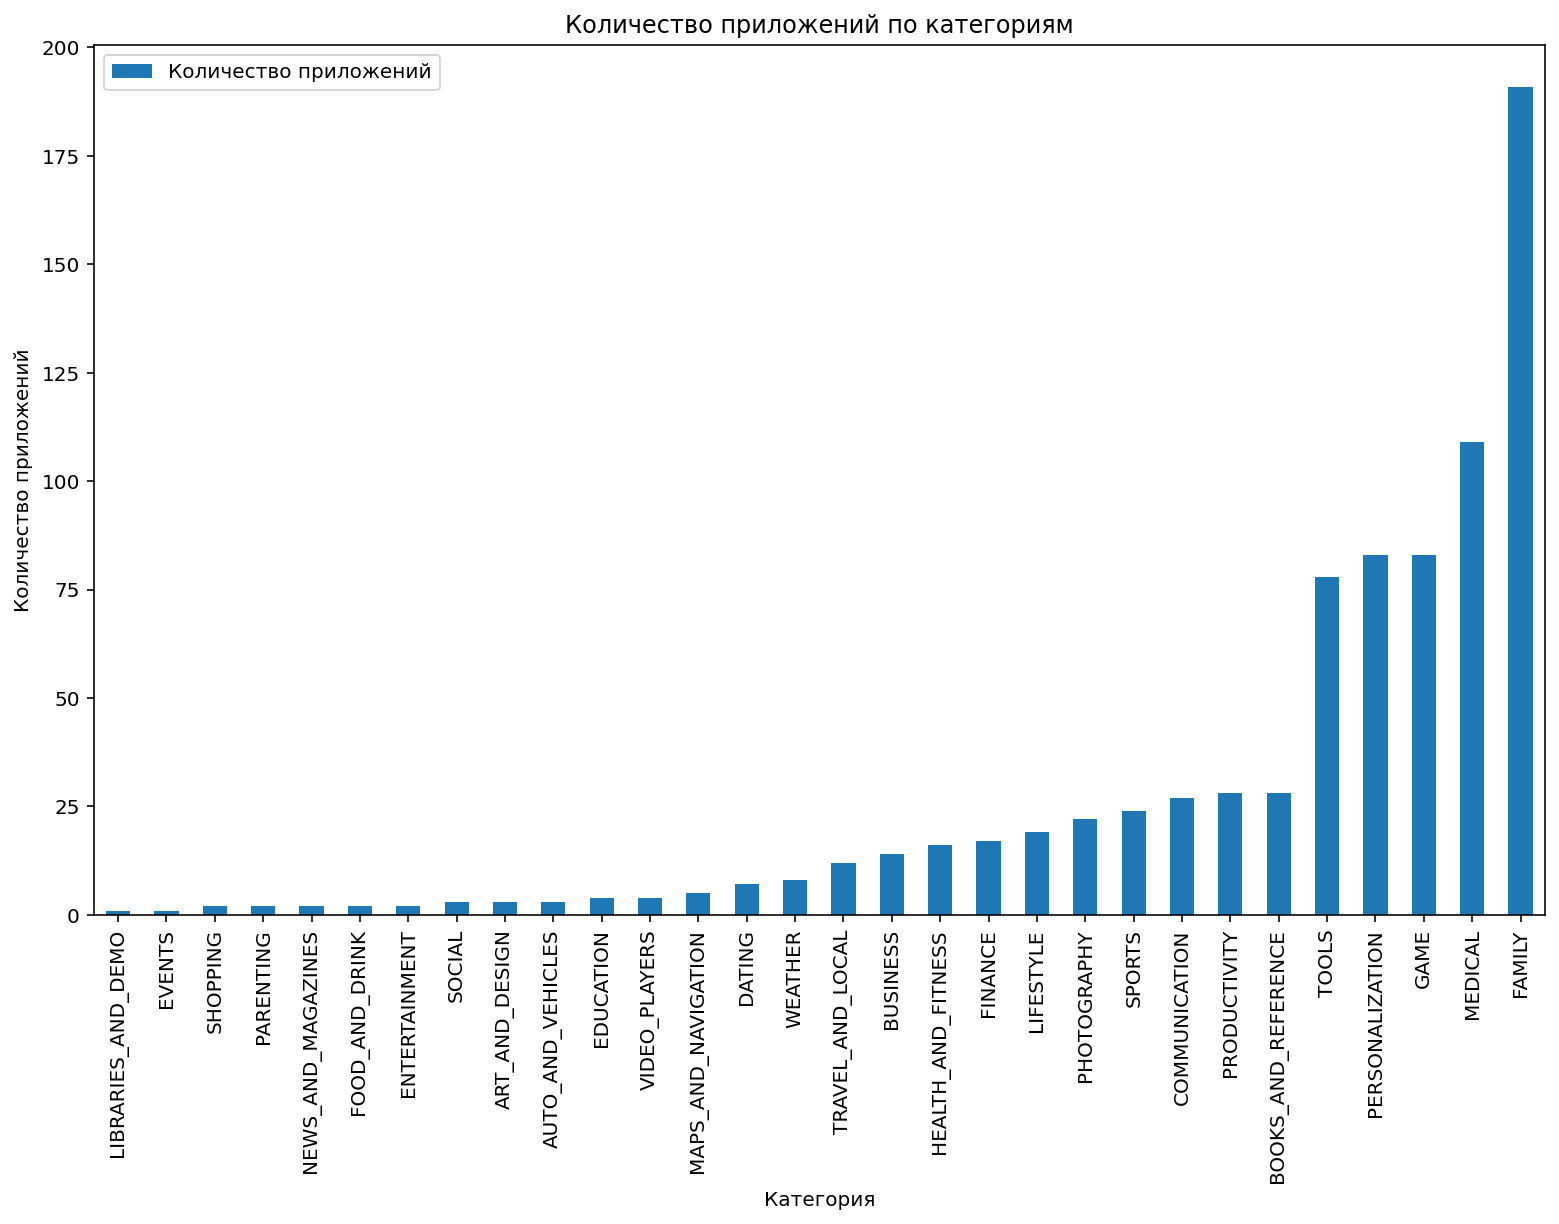

In [74]:
apps_paid_count_by_categories_bar_chart = apps_paid_count_by_categories.plot.bar(title='Количество приложений по категориям', xlabel='Категория', ylabel='Количество приложений')
apps_paid_count_by_categories_bar_chart.legend(['Количество приложений'])

### Интерпретация

Здесь ситуация несколько меняется по сравнению с графиком количества приложений по всем категориям. В группе приложений с подавляющим количеством на рынке появились приложения из категорий: медицинские и персонализация

### Вывод

Среди платных приложений в категориях медицинские и персонализация есть также большая конкуренция

***

Теперь было бы интересно взглянуть на соотношение количества платных приложений к бесплатным по категориям

In [70]:
apps_type_relation_by_category = apps[['App', 'Type', 'Category']].groupby(['Category', 'Type']).count().unstack('Type').fillna(0)

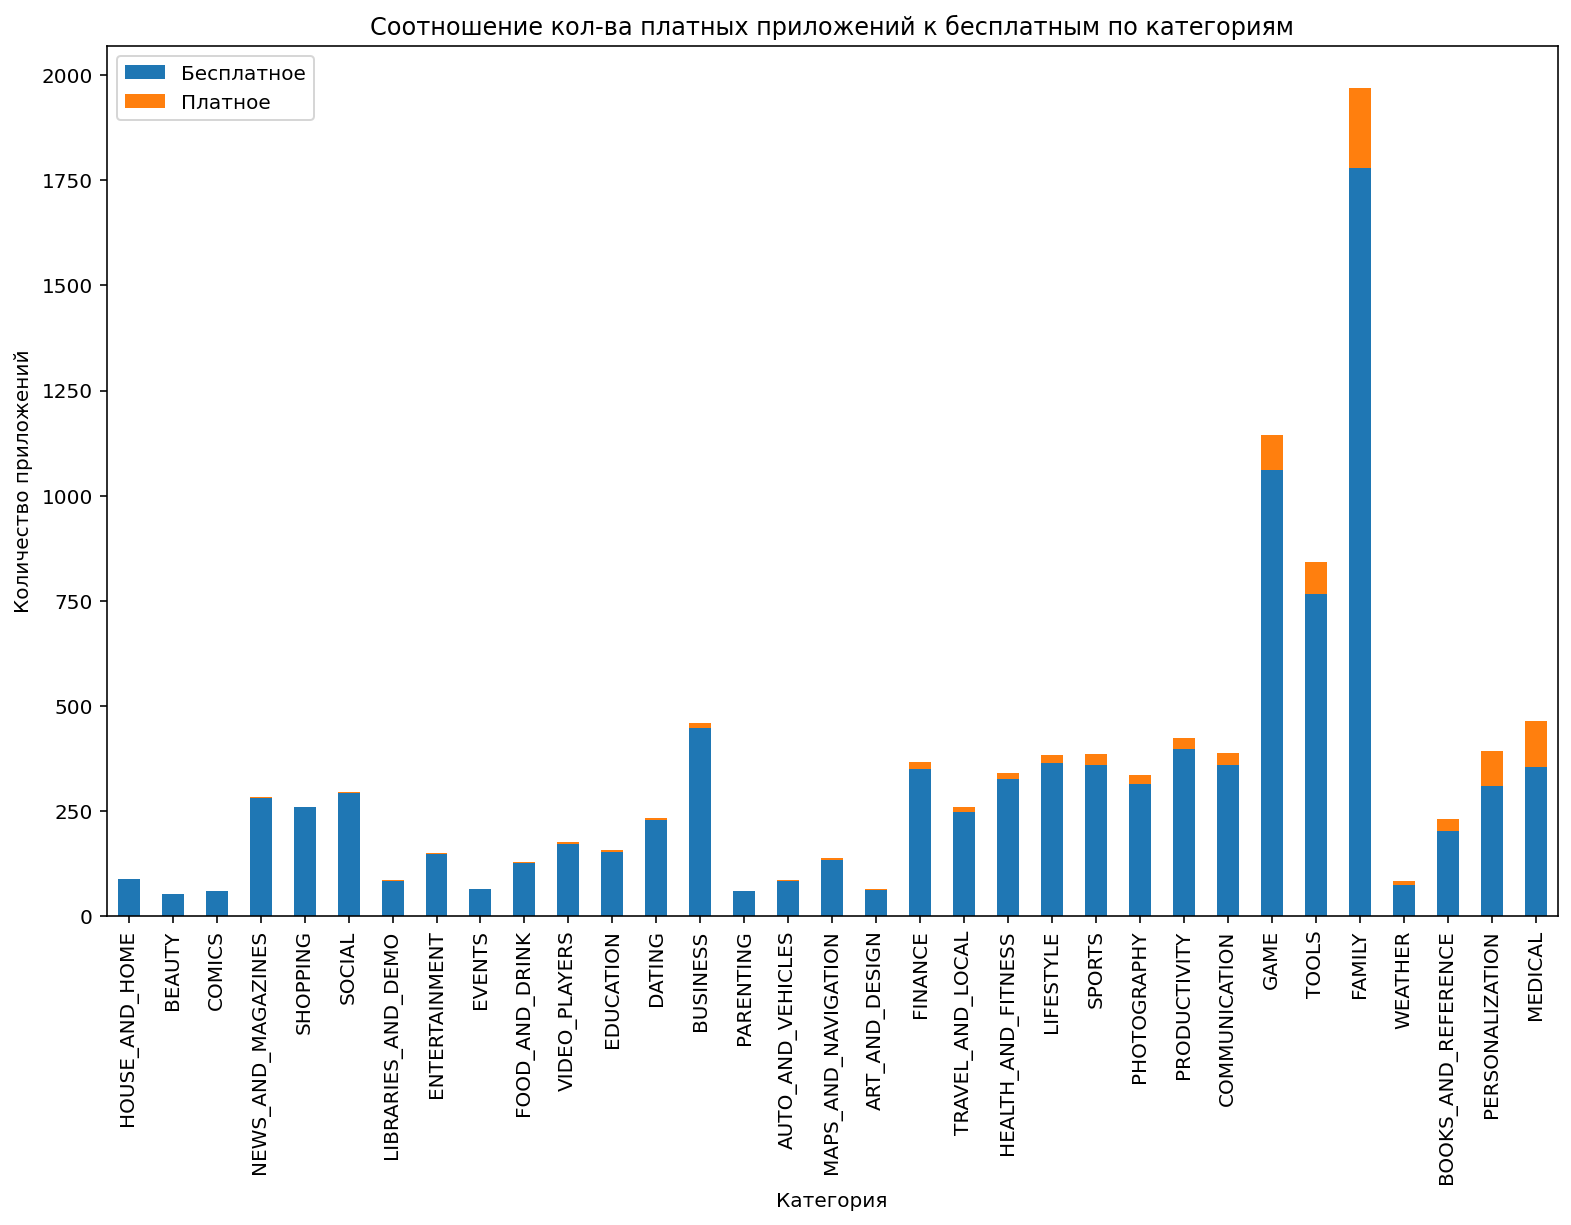

In [165]:
apps_type_relation_by_category_bar_chart = apps_type_relation_by_category.plot.bar(stacked=True, xlabel='Категория', ylabel='Количество приложений', title='Соотношение кол-ва платных приложений к бесплатным по категориям')
apps_type_relation_by_category_bar_chart.legend(['Бесплатное', 'Платное'])

Отсортируем категории по этому соотношеню

In [110]:
apps_type_relation_by_category['Paid/free count ratio'] = apps_type_relation_by_category.apply(lambda row: row['App']['Paid'] / row['App']['Free'], axis=1)

In [118]:
apps_type_relation_by_category = apps_type_relation_by_category.sort_values(by='Paid/free count ratio').drop(['Paid/free count ratio'], axis=1)

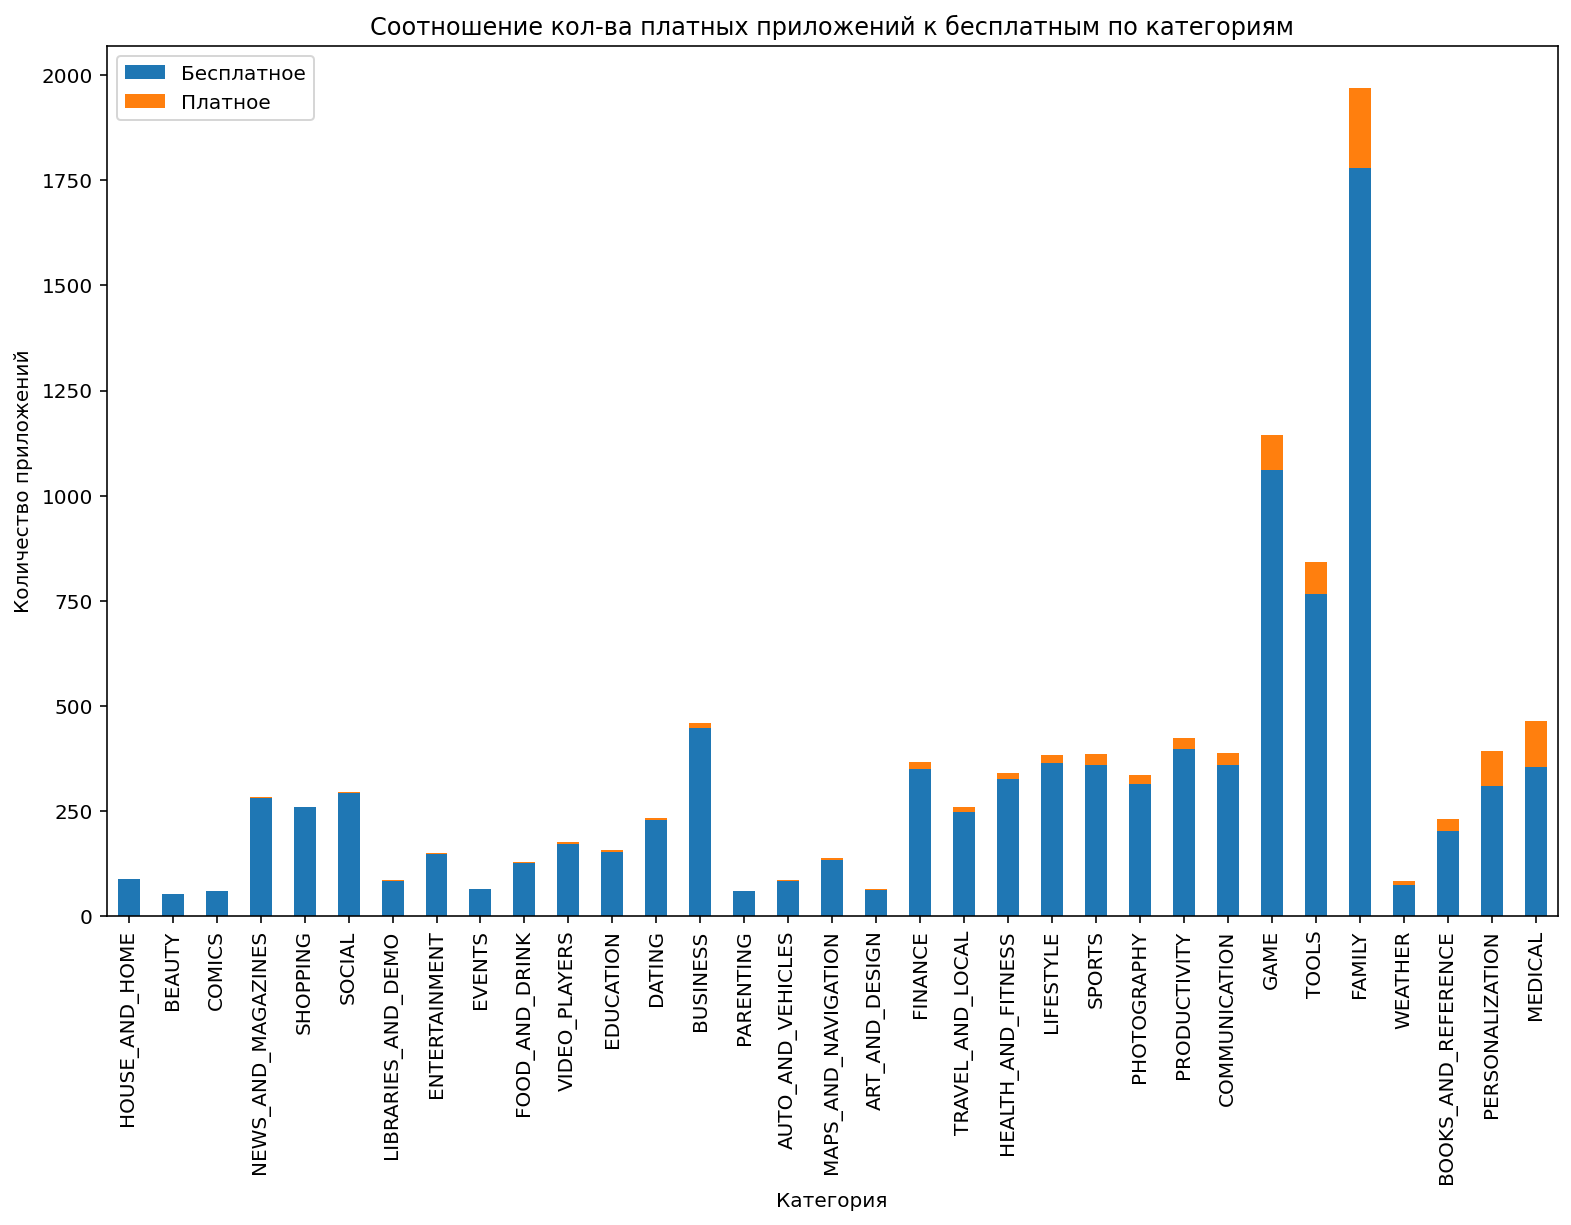

In [168]:
apps_type_relation_by_category_bar_chart = apps_type_relation_by_category.plot.bar(stacked=True, xlabel='Категория', ylabel='Количество приложений', title='Соотношение кол-ва платных приложений к бесплатным по категориям')
apps_type_relation_by_category_bar_chart.legend(['Бесплатное', 'Платное'])

### Интерпретация

На графике видно, что по соотношению количества платных приложений к бесплатным лидируют следующие категории: медицинские, персонализация, книги/справочники, а также погода. Интересно отметить, что самые популярные категории по количеству приложений на рынке - семья, инструменты и игры - здесь не лидируют, то есть в них в целом меньше платных приложений по отношению к бесплатным

### Вывод

Можно сказать, что создавая новое бесплатное приложение должного качества в этих трех категориях - медицинские, персонализация и книги/справочники - можно значительно увеличить шансы на успех на рынке, поскольку в них досаточно большое количество платных приложений. С другой стороны в некоторых категорях вообще нет или очень мало платных приложений. То есть можно сказать, что создавая платное приложение в одной из этих категорий должно качества, можно рассчитывать на успех

***

Давайте предположим, что мы хотим создать новое платное приложение для бизнеса (категория BUSINESS). В этой категории отношение количества платных к бесплатным достаточно низкое и мы можем предполагать, что если в целом качество платных приложений не очень высокое, то наше приложение может иметь шансы на успех, если будет высокого качества

In [153]:
apps_business = apps[apps.Category == 'BUSINESS']
apps_business_free = apps_business[apps_business.Type == 'Free']
apps_business_paid = apps_business[apps_business.Type == 'Paid']

<AxesSubplot:title={'center':'Распределение оценок платных приложений'}, ylabel='Оценка'>

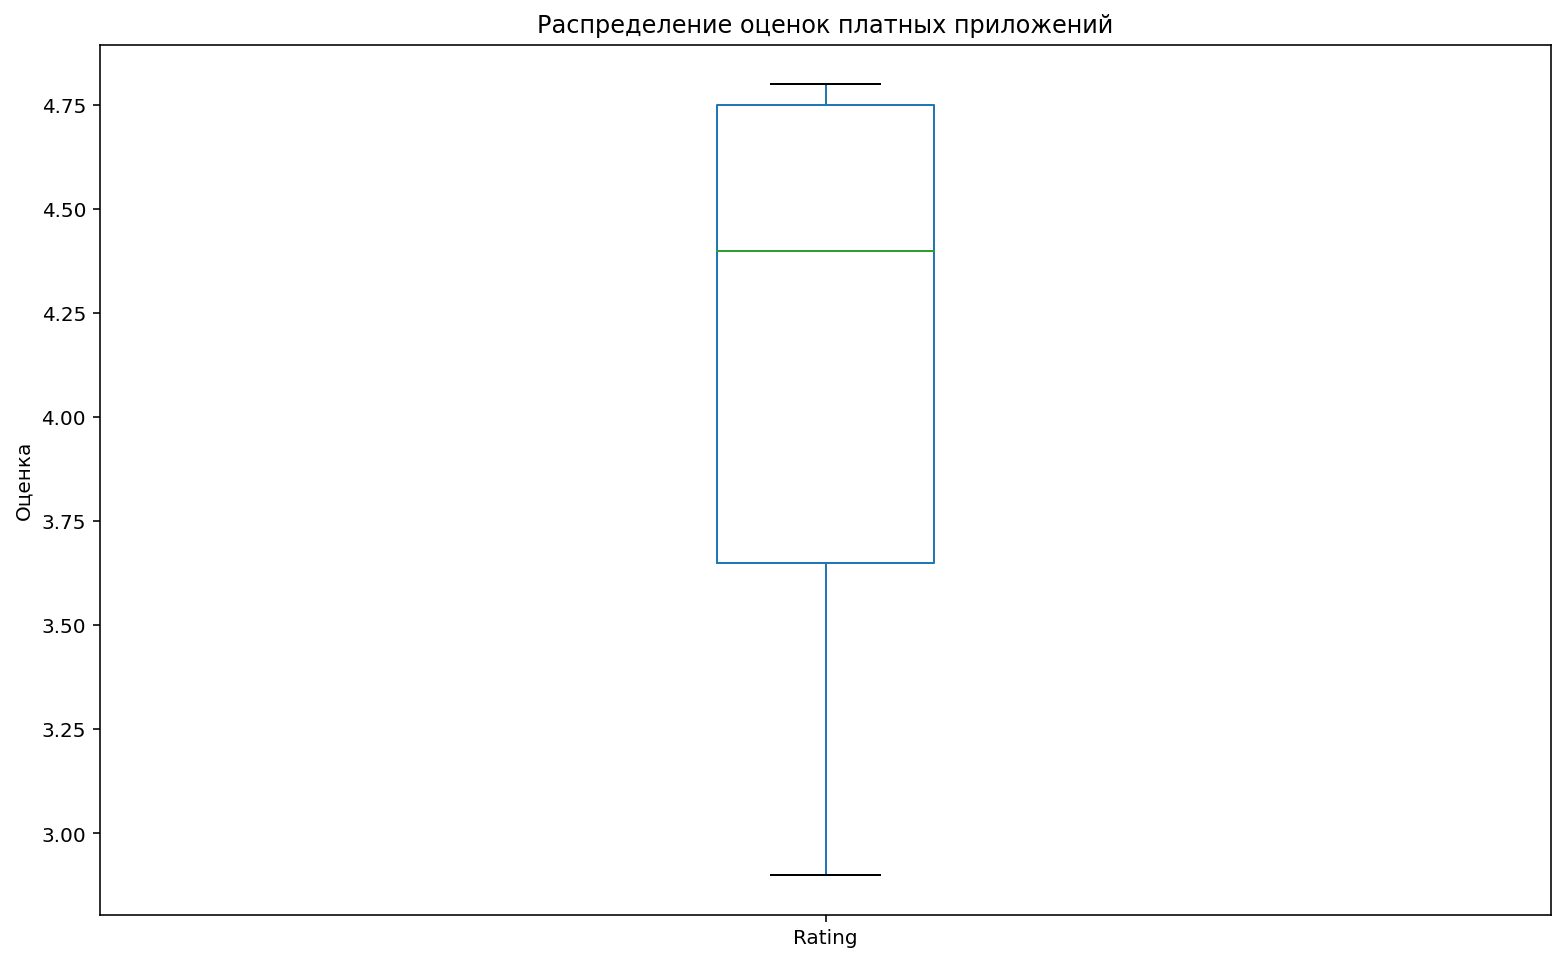

In [171]:
apps_business_paid.Rating.plot.box(ylabel='Оценка', title='Распределение оценок платных приложений')

<AxesSubplot:title={'center':'Распределение оценок бесплатных приложений'}, ylabel='Оценка'>

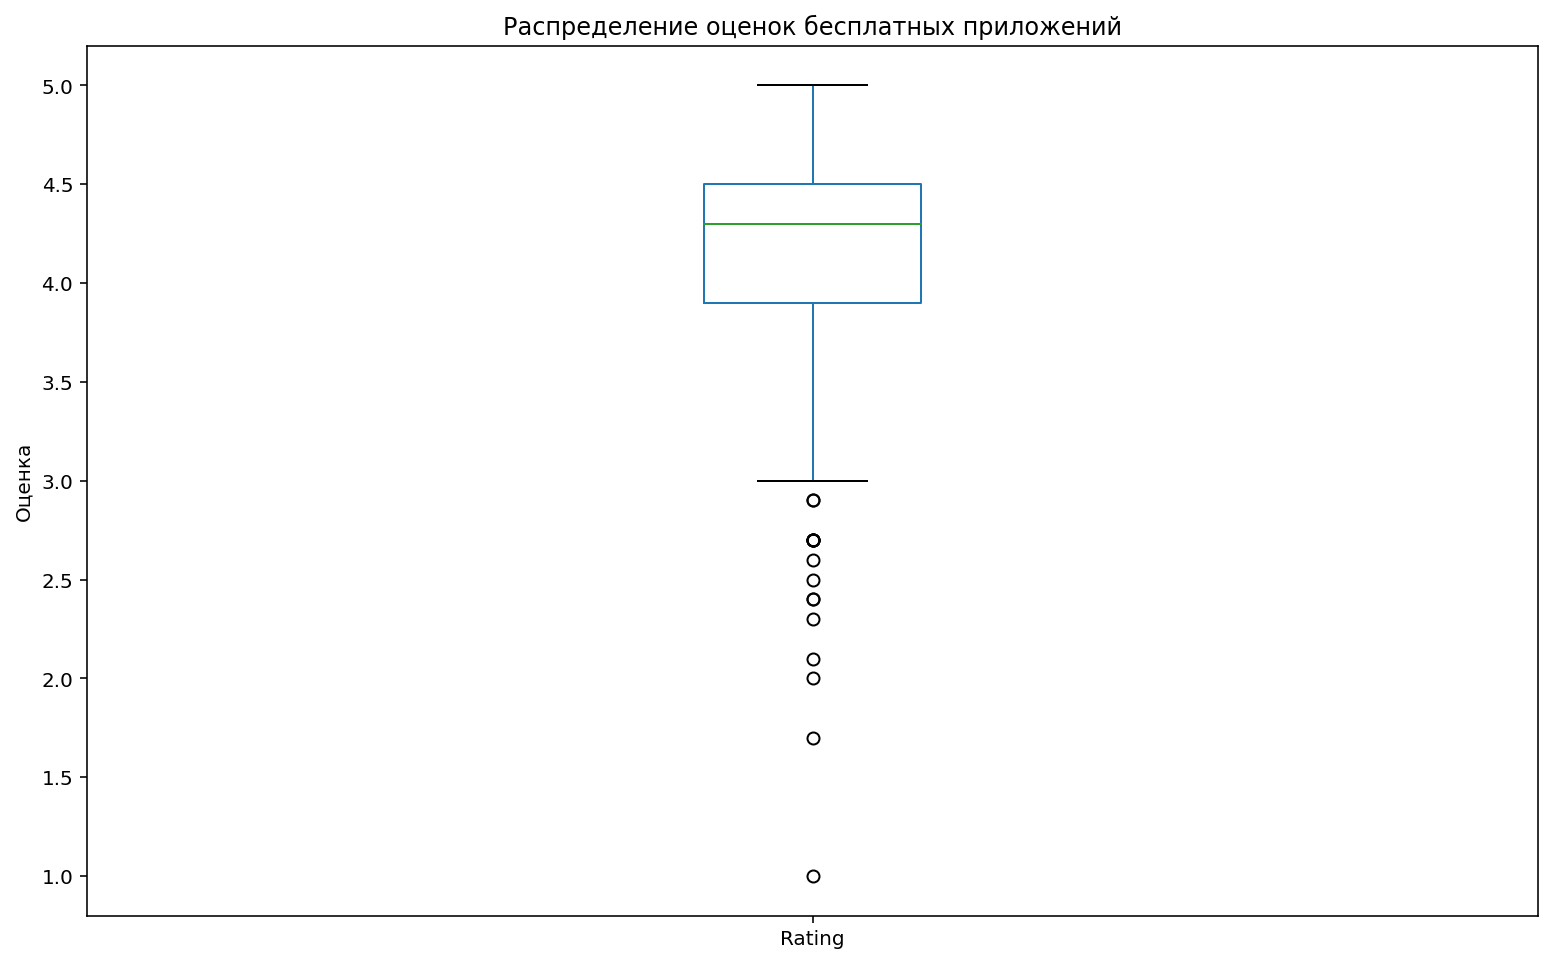

In [173]:
apps_business_free.Rating.plot.box(ylabel='Оценка', title='Распределение оценок бесплатных приложений')

### Интерпретация

У графика распределения оценок платных приложений наблюдается достаточно сильное смещение вверх, большой межквартильный размах, длинный нижний ус и короткий верхний, медиана около 4.4. У графика распределения оценок бесплатных приложений также сильное смещение вверх, малый межквартильный размах, нижний и верхний усы одинакого среднего размера, медиана около 4.3

### Вывод

Первый график говорит о том, что оценки пользователей широко распределяются в диапазоне от 3.7 до 4.7. Логично, что есть большое количество достаточно средних оценок, посколько пользователи предъявляют повышенные требования к платным приложениям, особенно из категории Бизнес. Но в целом качество приложений достаточно высокое, что говорит об удовлетворенности пользователей платными приложениями из этой категории. Стоит также обратить внимание на нижний ус, который может говорить как о том, что приложения низкого качества, так и то, что они не в полной мере удовлетворили их потребностей. 

Второй график интересен тем, что в целом можно сказать, что даже бесплатные приложения в этой категории достаточно высокого качества (или среднего качества, но поскольку они бесплатные, то пользователи не склонны ставить низкие оценки). 

В целом можно сказать, что если создавать платное приложение в этой категории, то нужно во-первых, очень тщательно подойти к определению назначения, чтобы удовлетворить потребности пользователей, и во-вторых, максимально ответственно отнестись к его качеству, поскольку конкуренция очень высока. Легко войти на рынок не получится

***

In [175]:
import seaborn as sns

Попробуем посмотреть среднюю оценку пользователей по категиям среди платных и бесплатных приложений

In [203]:
apps_category_type_mean_rating = apps.pivot_table(index='Category', columns='Type', values='Rating', aggfunc='mean')
rcParams['figure.figsize'] = 4,20

<AxesSubplot:xlabel='Type', ylabel='Category'>

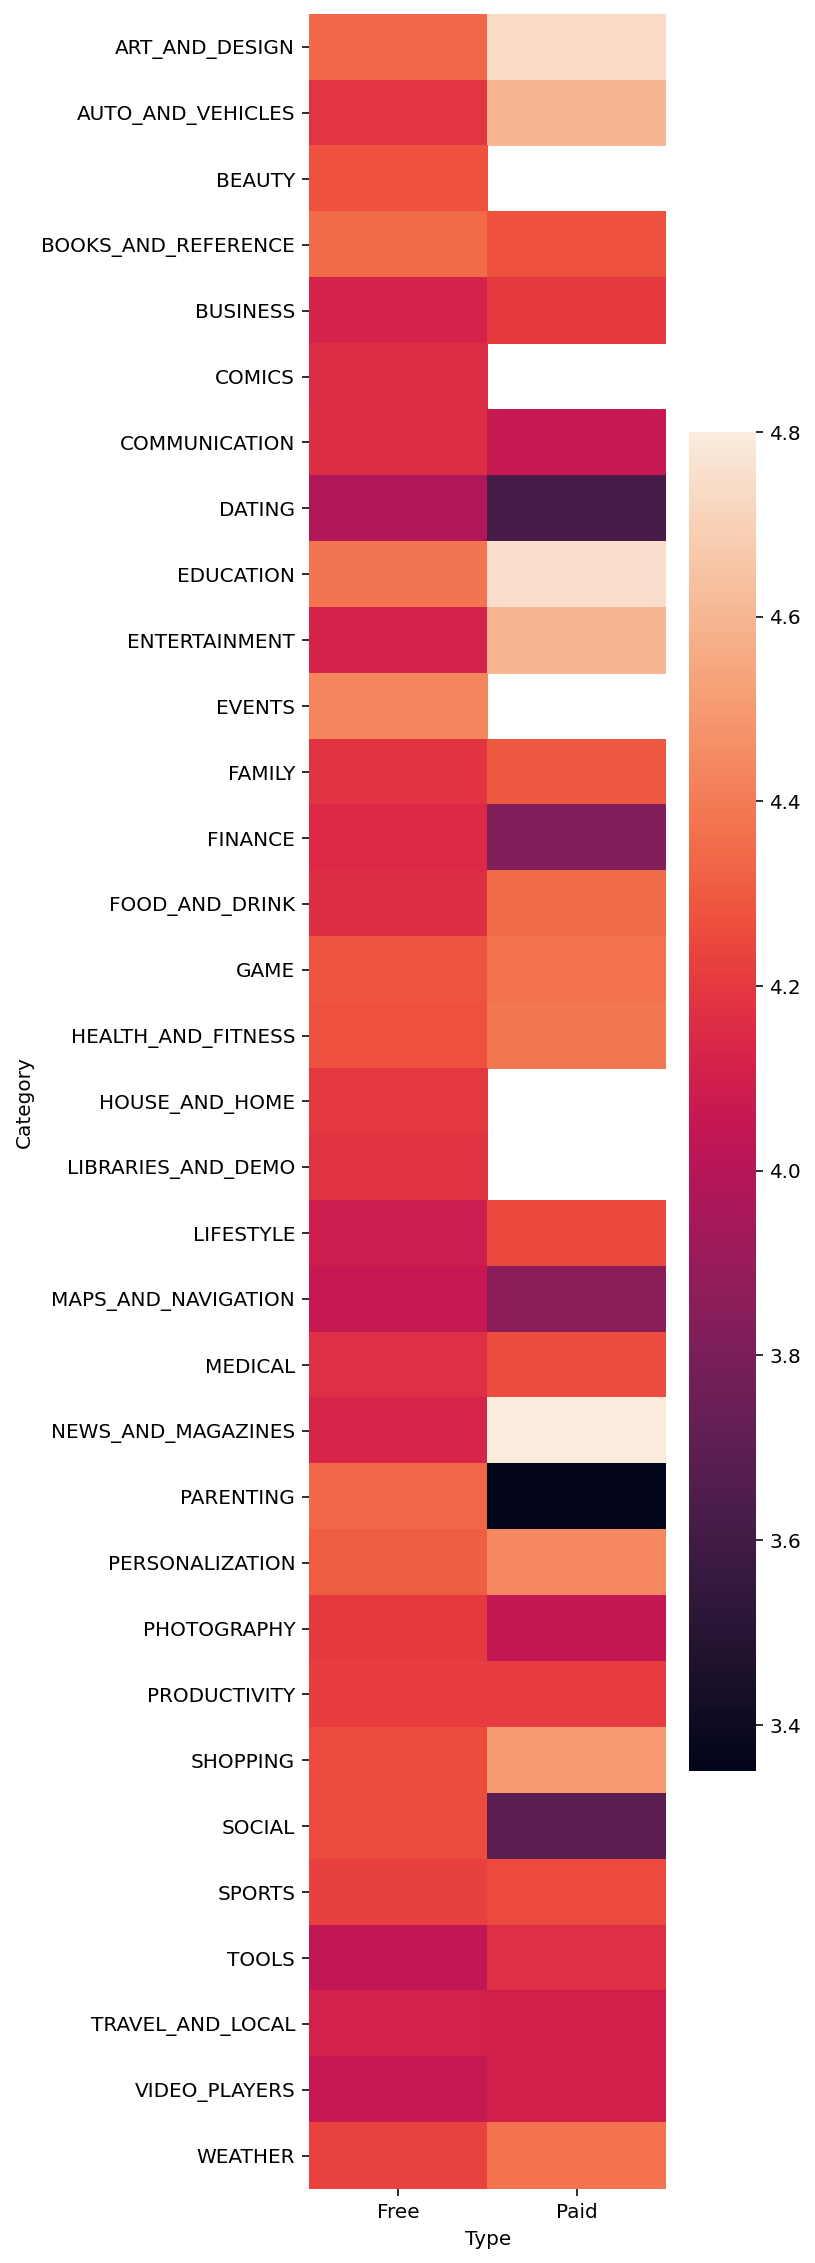

In [204]:
sns.heatmap(apps_category_type_mean_rating)

### Интерпретация

Среди бесплатных приложений оценка колеблется в средних значениях. Среди платных достаточно большой разброс

### Вывод

Интересно выделить, что среди бесплатных приложений средняя оценка наиболее низкая у категории Знакомства. Однако чуть больший интерес вызывают платные приложения. Здесь крайне низкий рейтинг имеют приложения из категорий:
- Знакомства
- Карты и навигация
- Воспитание (родительский контроль)
- Социальные

Именно в этих категориях, возможно, наиболее выгодно запускать платное приложение, обеспечив его высокое качество